# Project 10 - Chapter 8 Advanced Data Analysis

In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data

In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index

We will be working with two datasets in the next example: the Fraser Economic Freedom Index and GDP from the Maddison Project.

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                     index_col = ["ISO_Code_3", "Year"],
                     parse_dates = True).rename(columns = {"Summary":"EFW"})
data
                 

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

## Isolate Individual that comprises the multi-index

In [2]:
countries = data.index.get_level_values("ISO_Code_3").unique()

In [3]:
years = data.index.get_level_values("Year").unique()
years

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [4]:
def create_indicator_variable(data, indicator_name, index_name,
                              target_index_list):
    data[indicator_name] = 0
    data[indicator_name][data.index.get_level_values(
    index_name).isin(target_index_list)] = 1
#    for index in target_index_list:
#        data.loc[data.index.get_level_values(
#        index_name) ==index, [indicator_name]] = 1

index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]
create_indicator_variable(data = data,
                         indicator_name = indicator_name,
                         index_name = index_name,
                         target_index_list = countries_in_north_america)
data.loc["USA"]

C:\Users\Owner\AppData\Local\Temp/ipykernel_17480/3762174670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name][data.index.get_level_values(


,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita,North America
Year,,,,,,,,,,,,,
1970-01-01,US,North America,NaN,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,1.648185,23958.0000,1
1975-01-01,US,North America,NaN,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,1.483975,25956.0000,1
1980-01-01,US,North America,NaN,United States,8.101368,5.788734,8.684269,9.122306,8.544966,8.359863,1.322304,29611.0000,1
1985-01-01,US,North America,NaN,United States,8.295413,6.582616,8.726823,9.339660,8.505198,8.335644,1.031484,33023.0000,1
1990-01-01,US,North America,H,United States,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,0.853932,36982.0000,1
1995-01-01,US,North America,H,United States,8.588435,7.446569,8.587870,9.787931,8.594211,8.538840,0.828418,39390.6254,1
2000-01-01,US,North America,H,United States,8.648077,7.704726,8.773170,9.607665,8.466601,8.739485,0.683215,45886.4705,1
2001-01-01,US,North America,H,United States,8.509072,7.521319,8.615158,9.612028,8.397002,8.464019,0.744511,45878.0092,1
2002-01-01,US,North America,H,United States,8.568646,7.673536,8.370127,9.724310,8.298912,8.819880,0.760212,46266.2959,1


## Plotting Indicator Variables in Scatter

C:\Users\Owner\AppData\Local\Temp/ipykernel_17480/3940490266.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (20, 12))


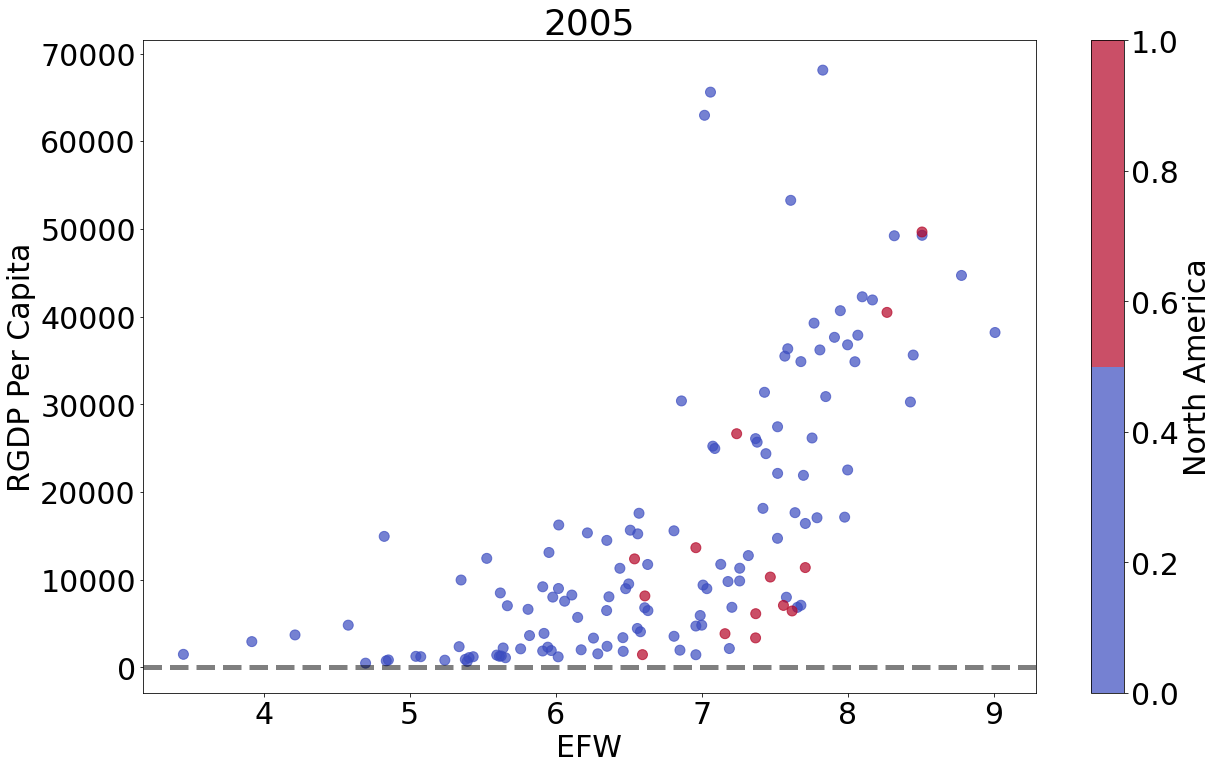

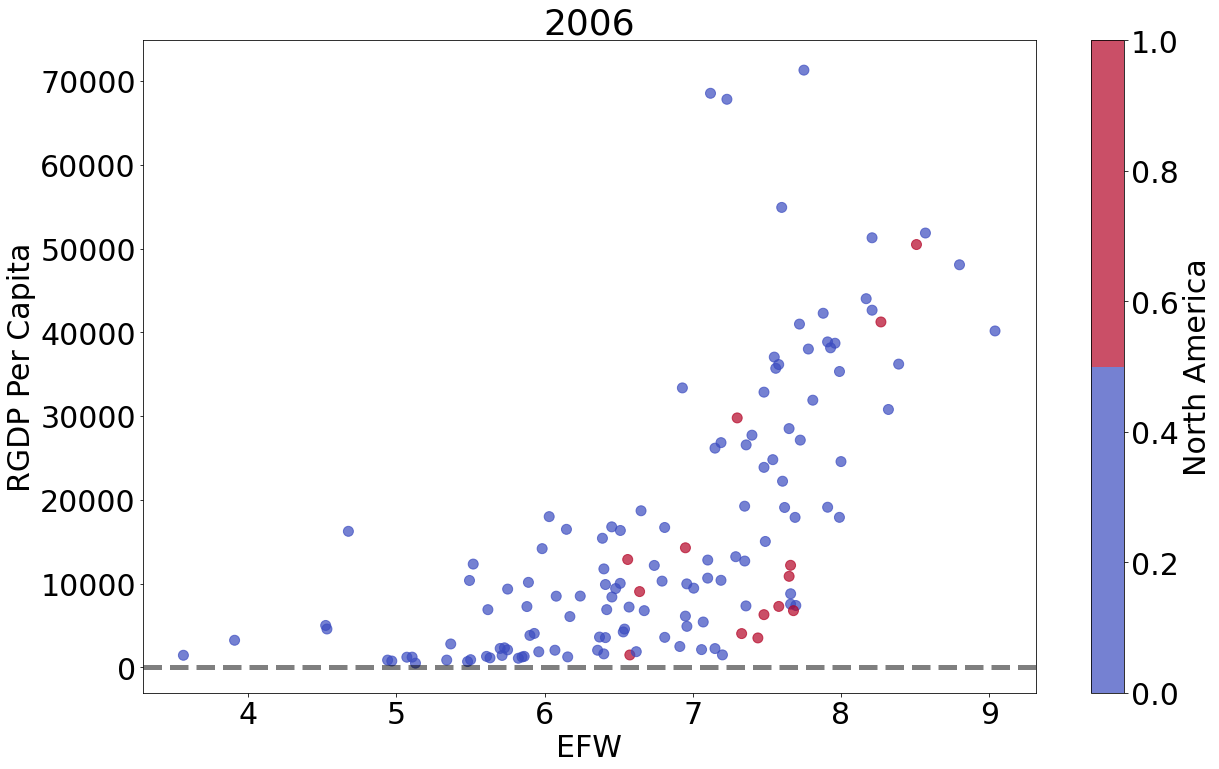

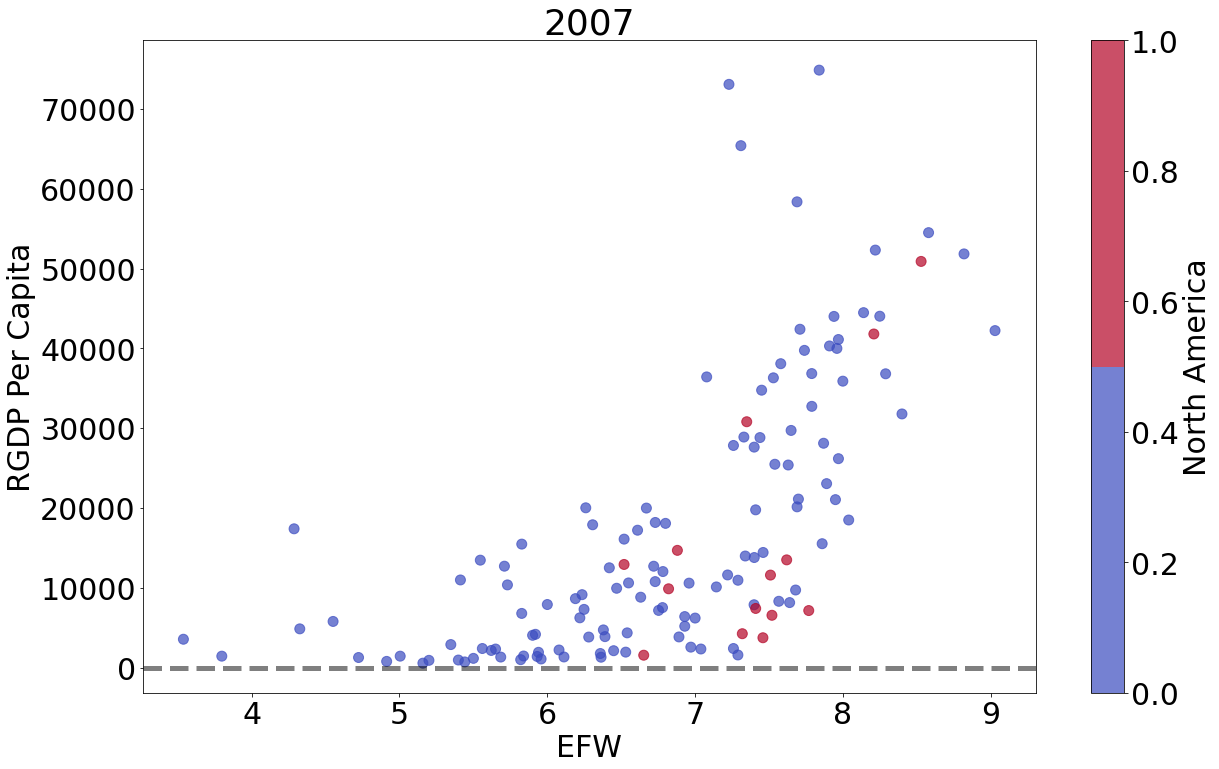

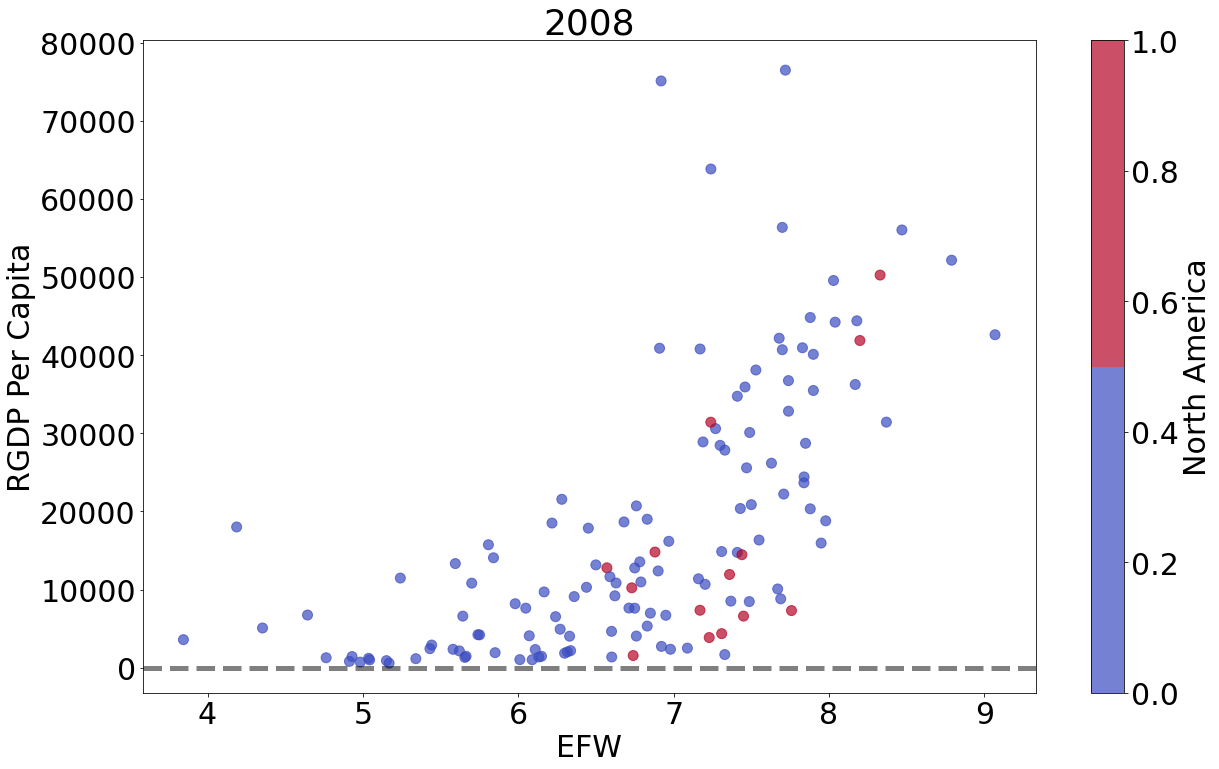

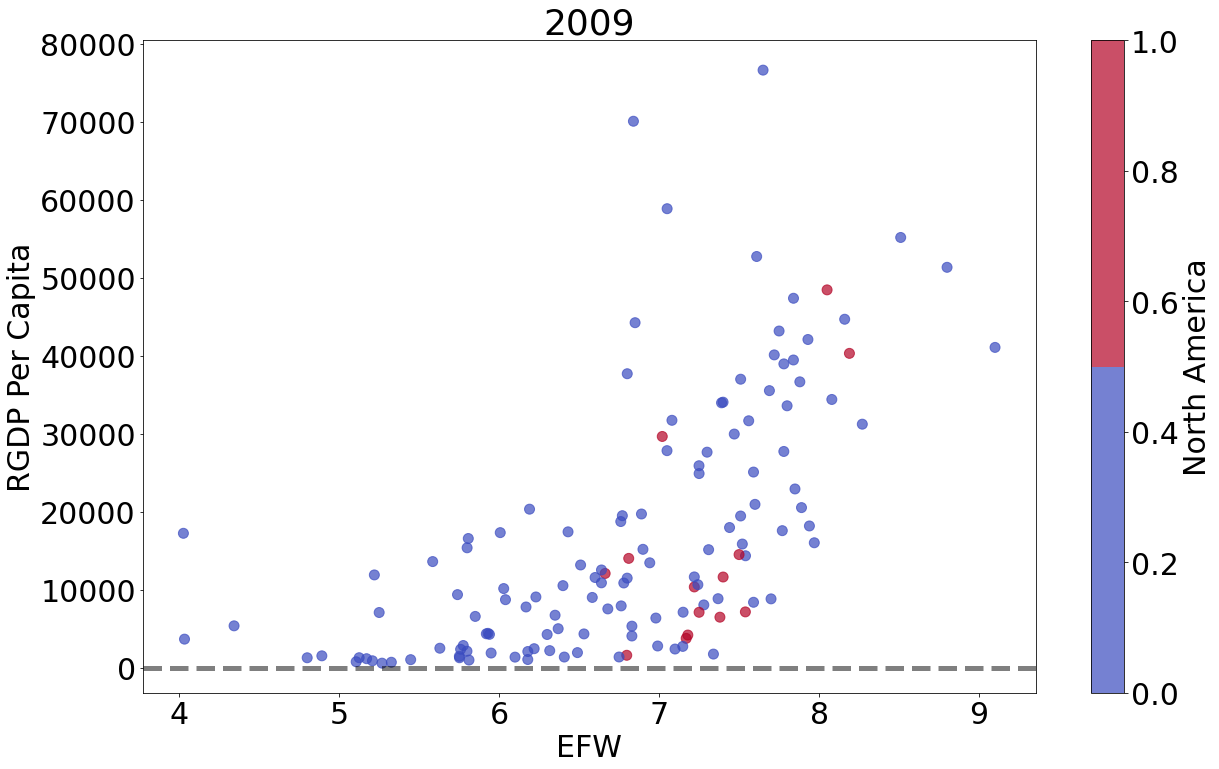

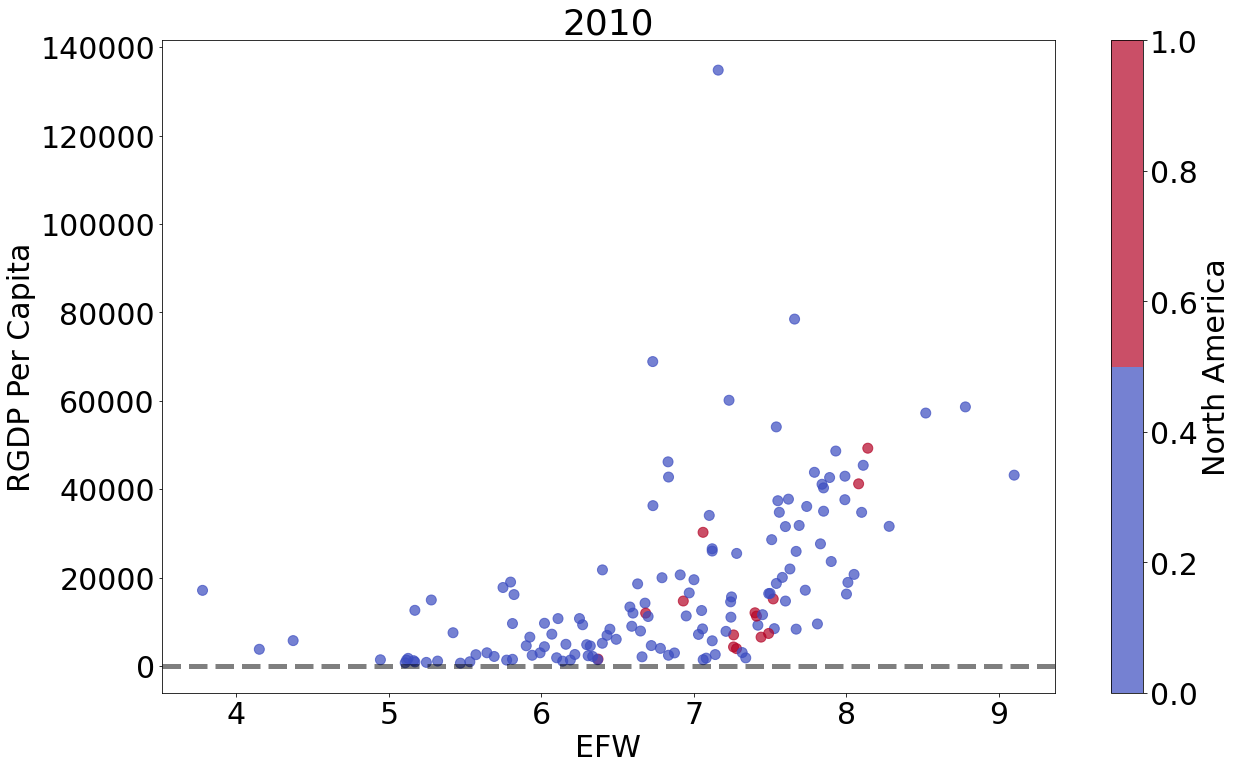

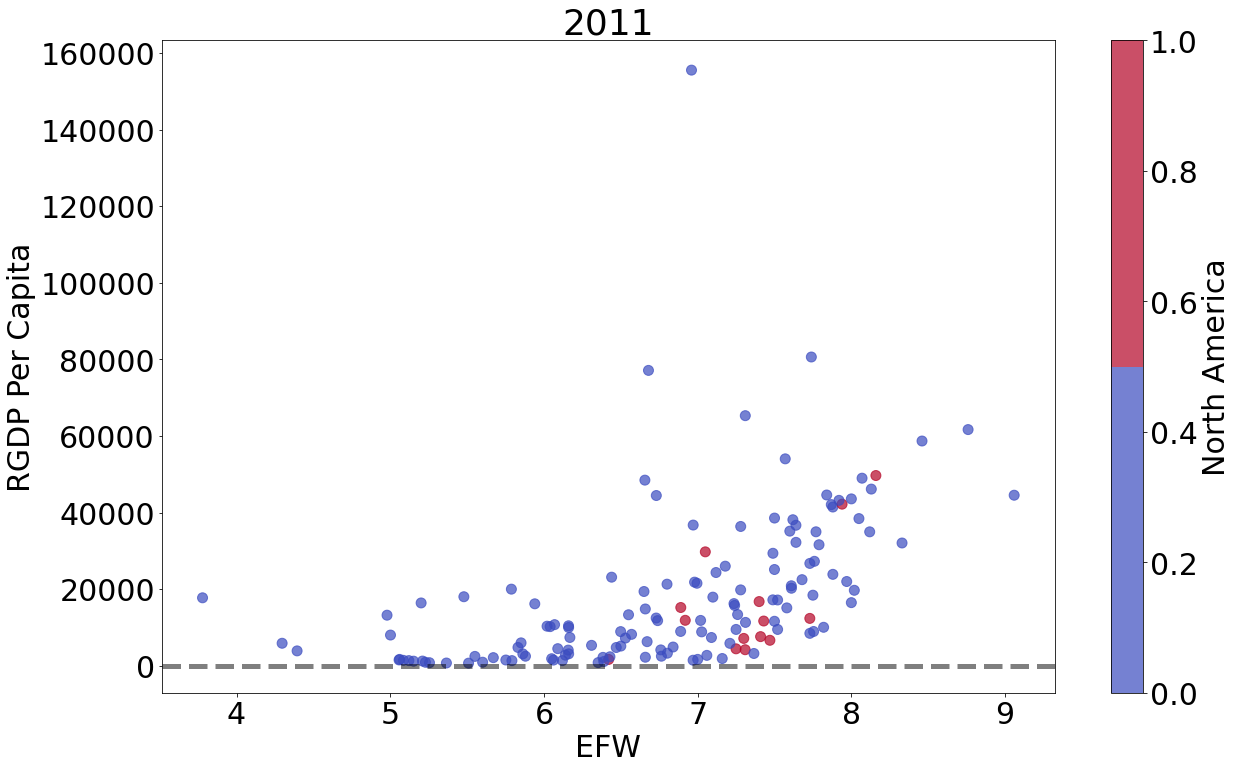

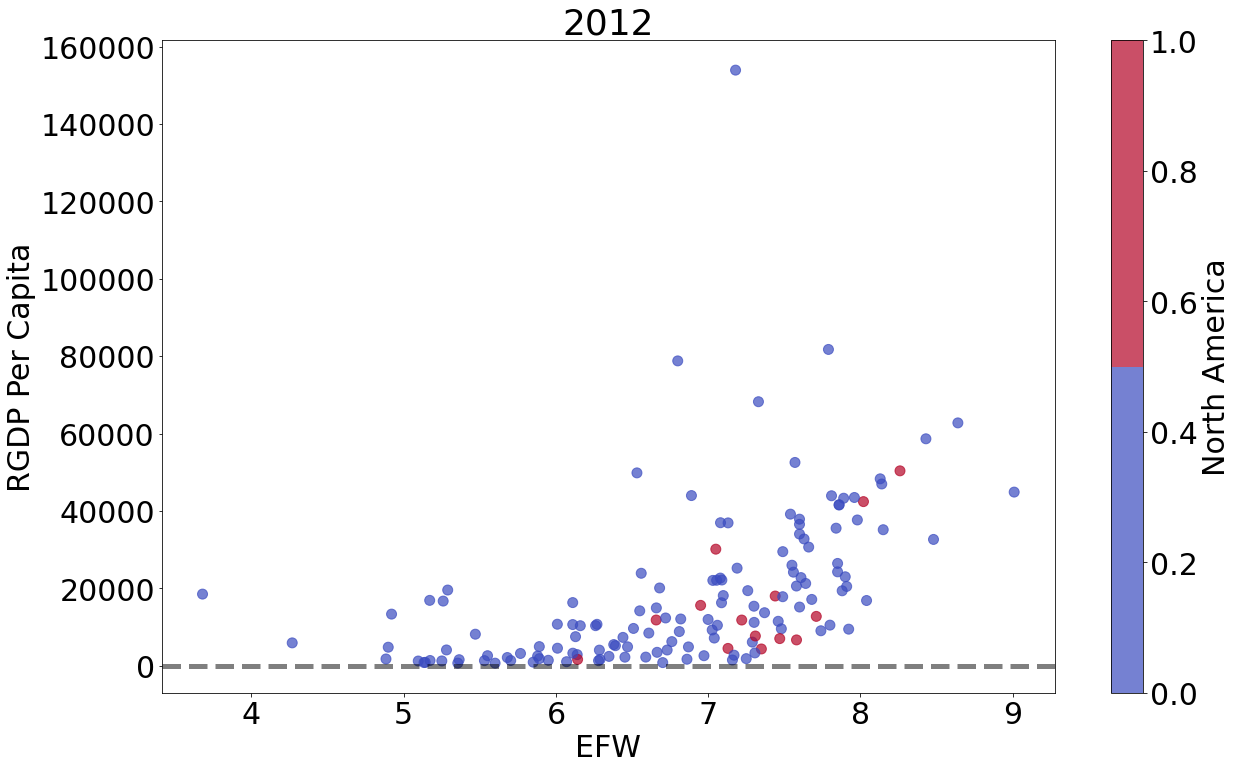

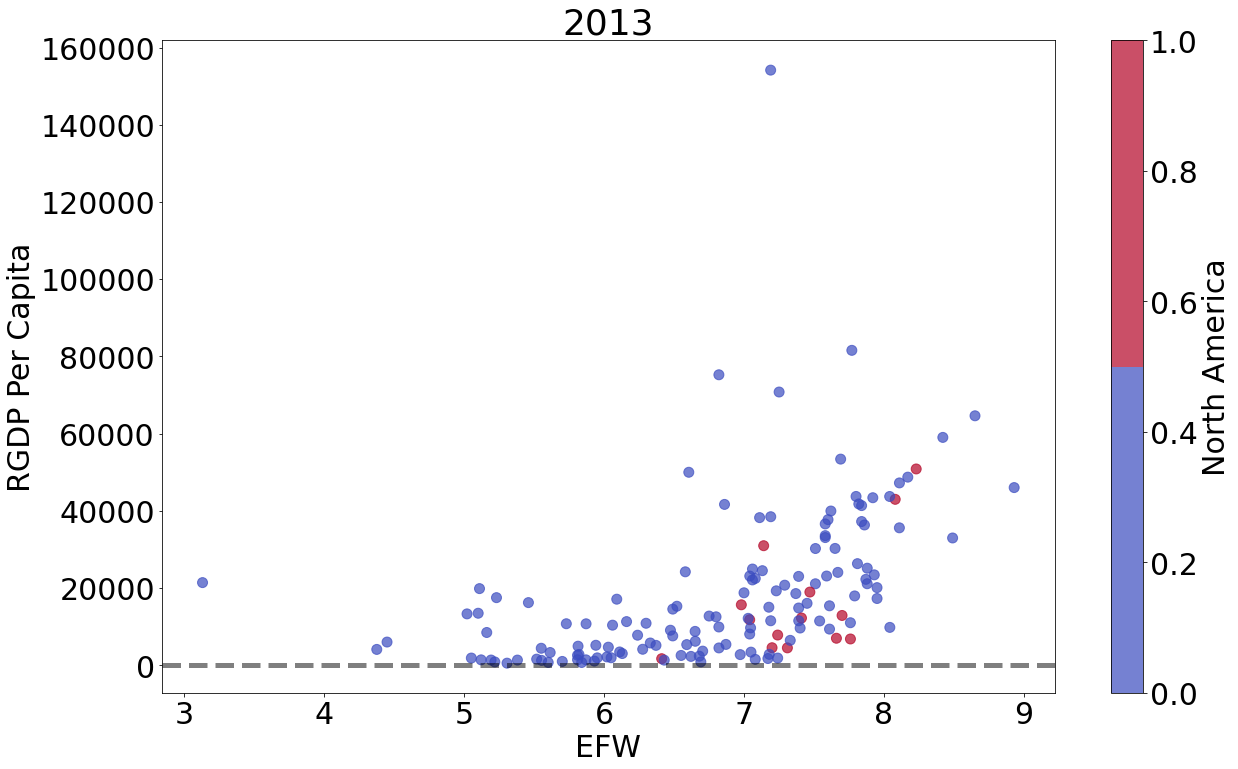

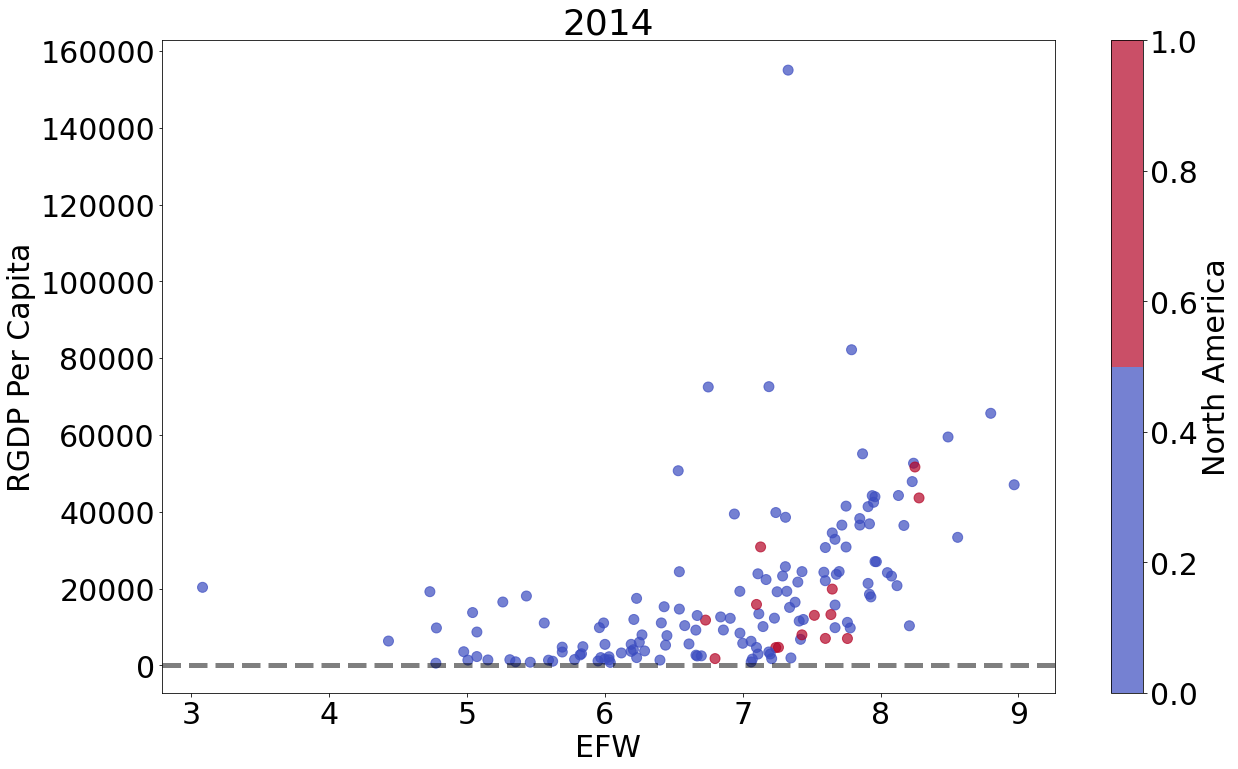

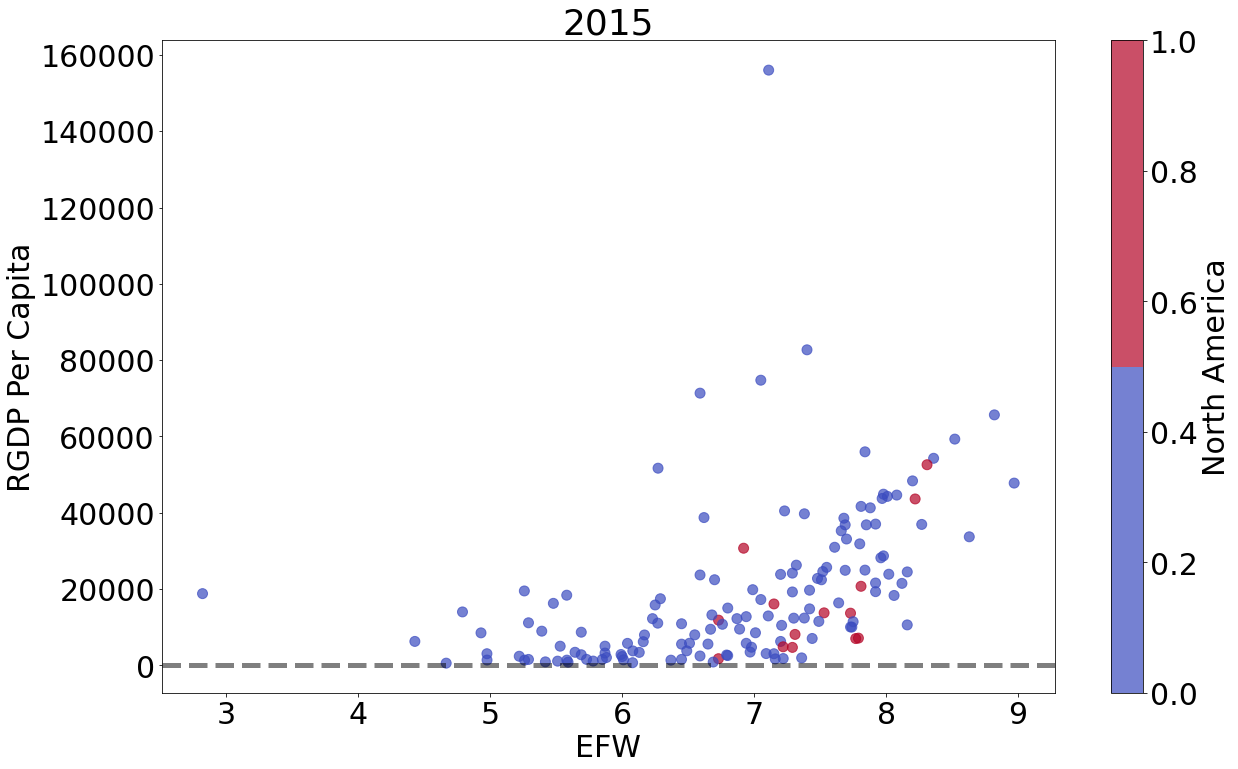

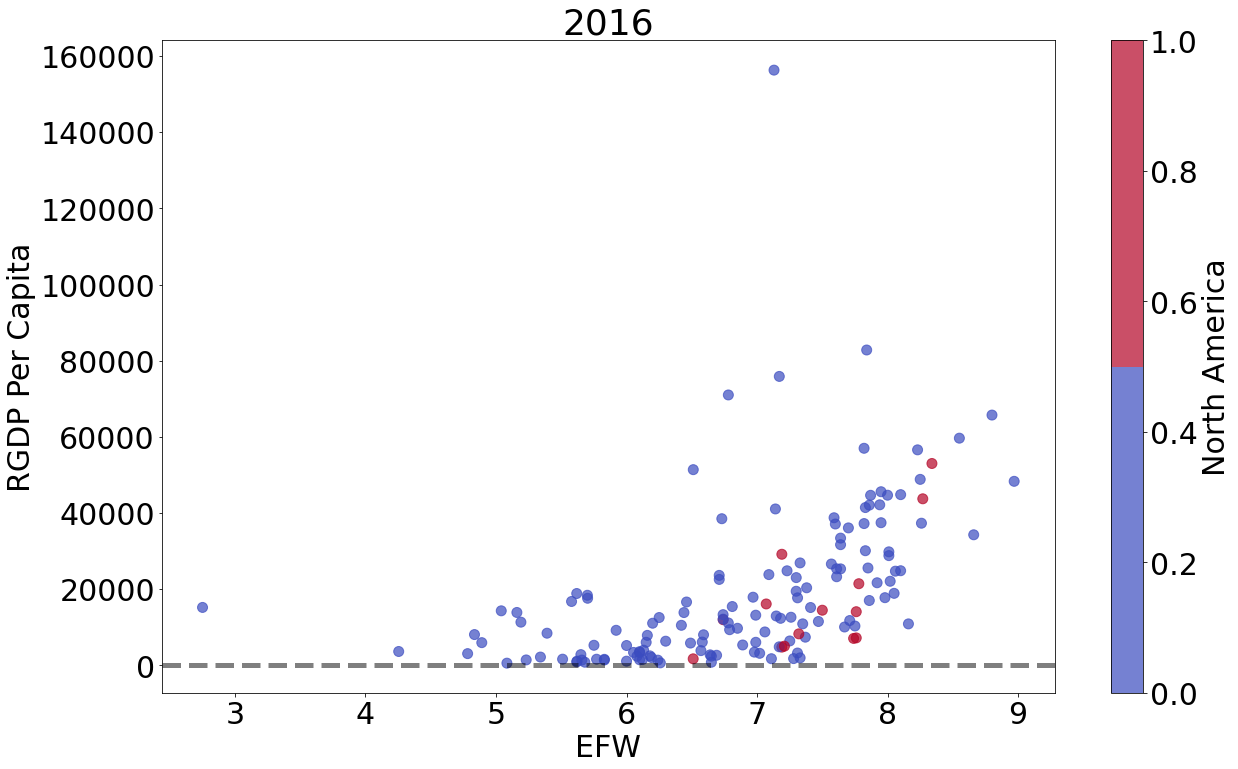

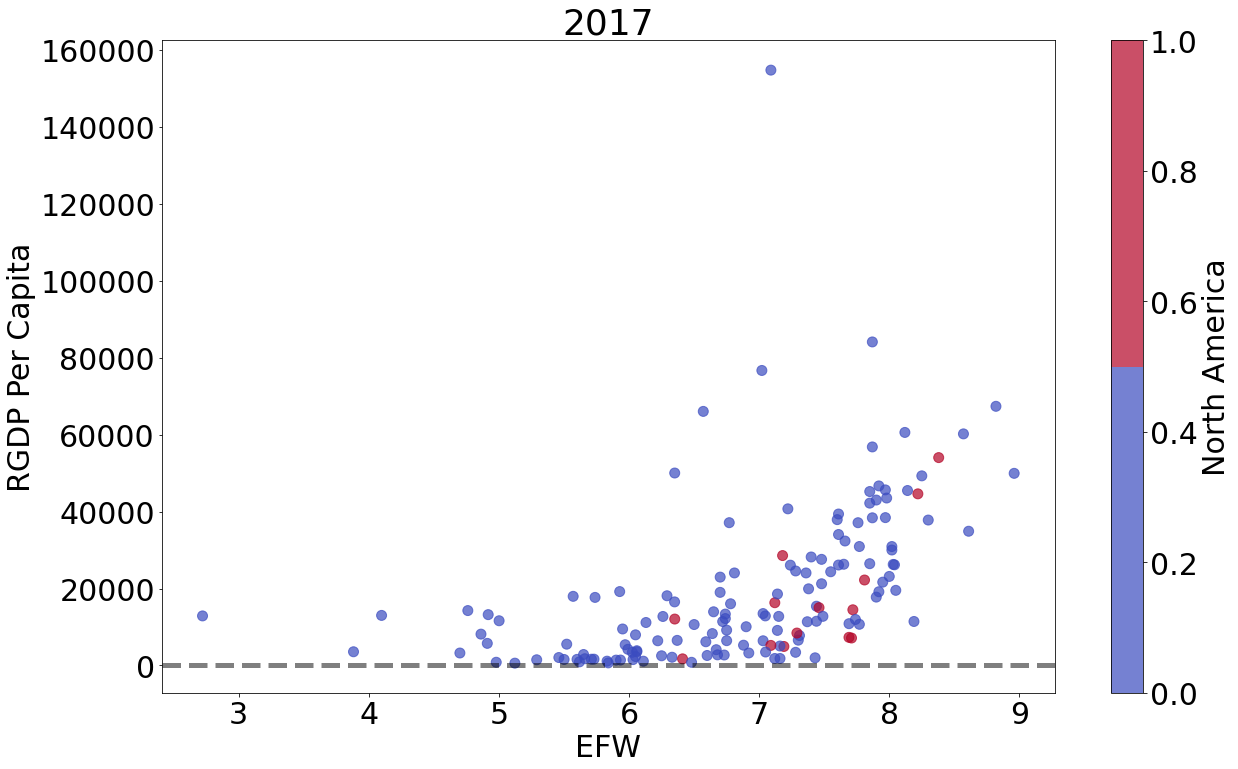

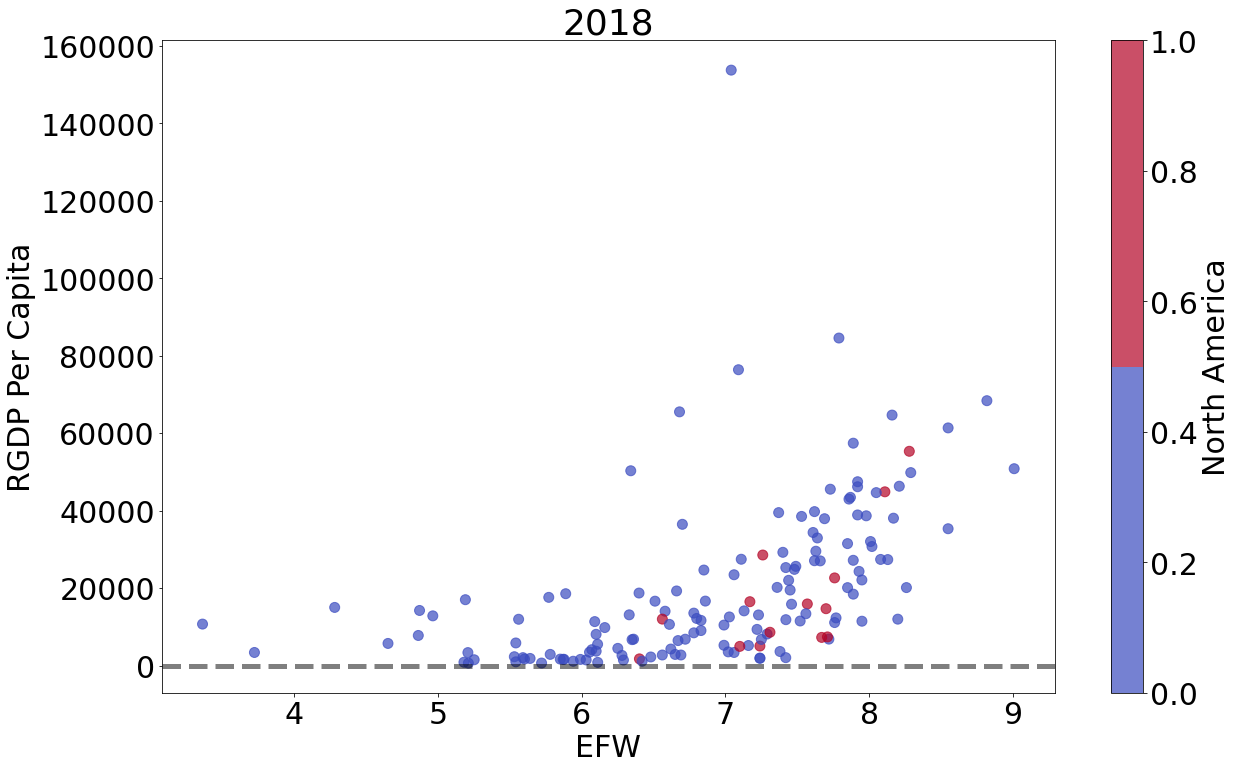

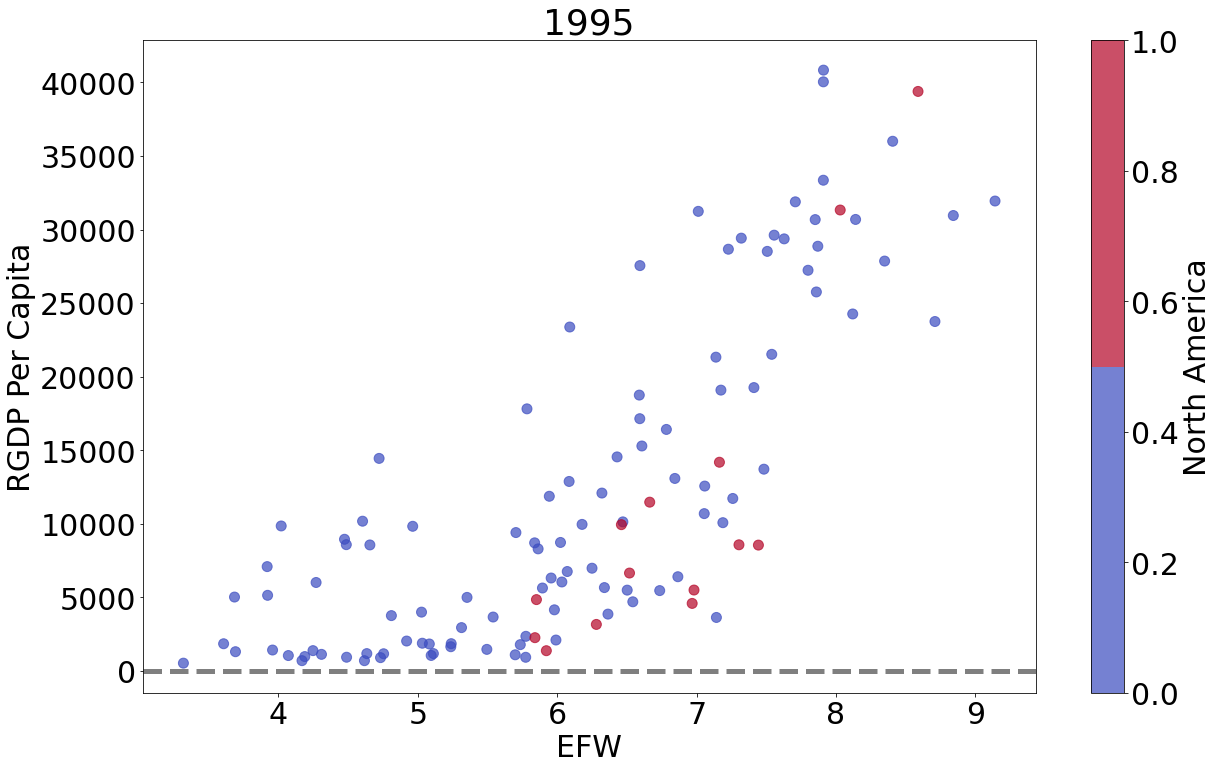

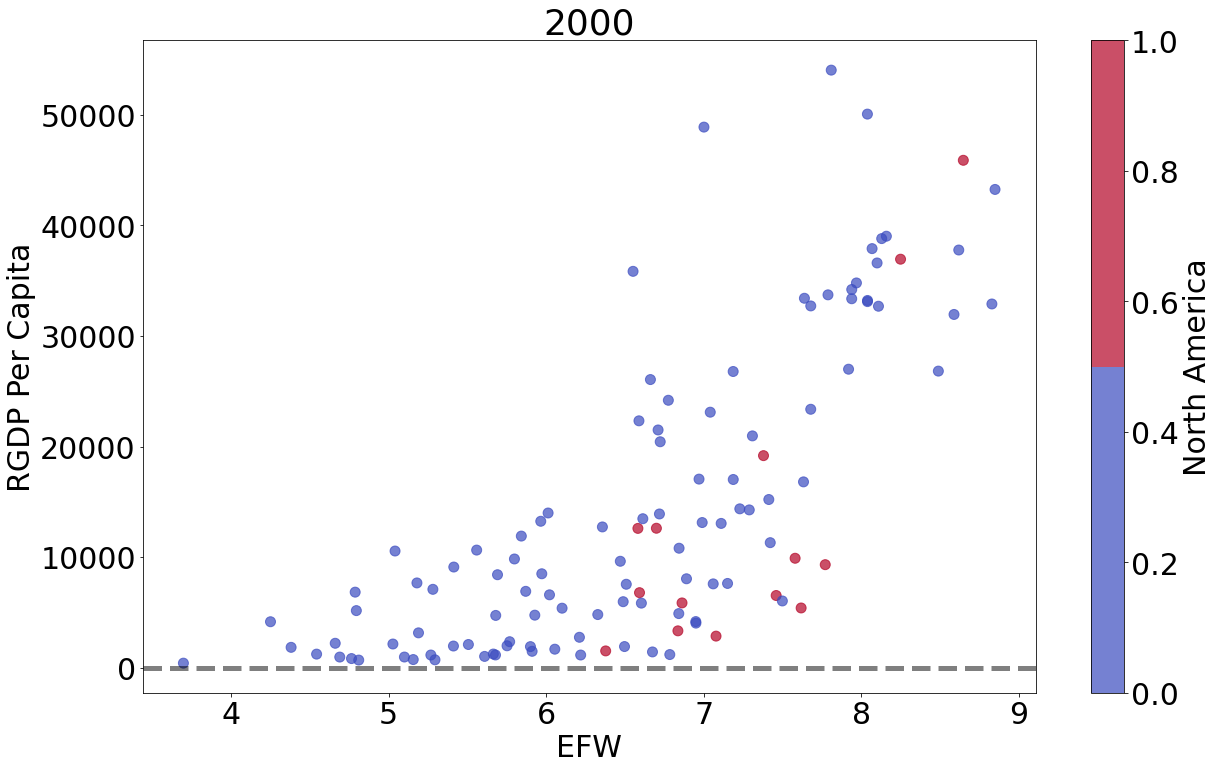

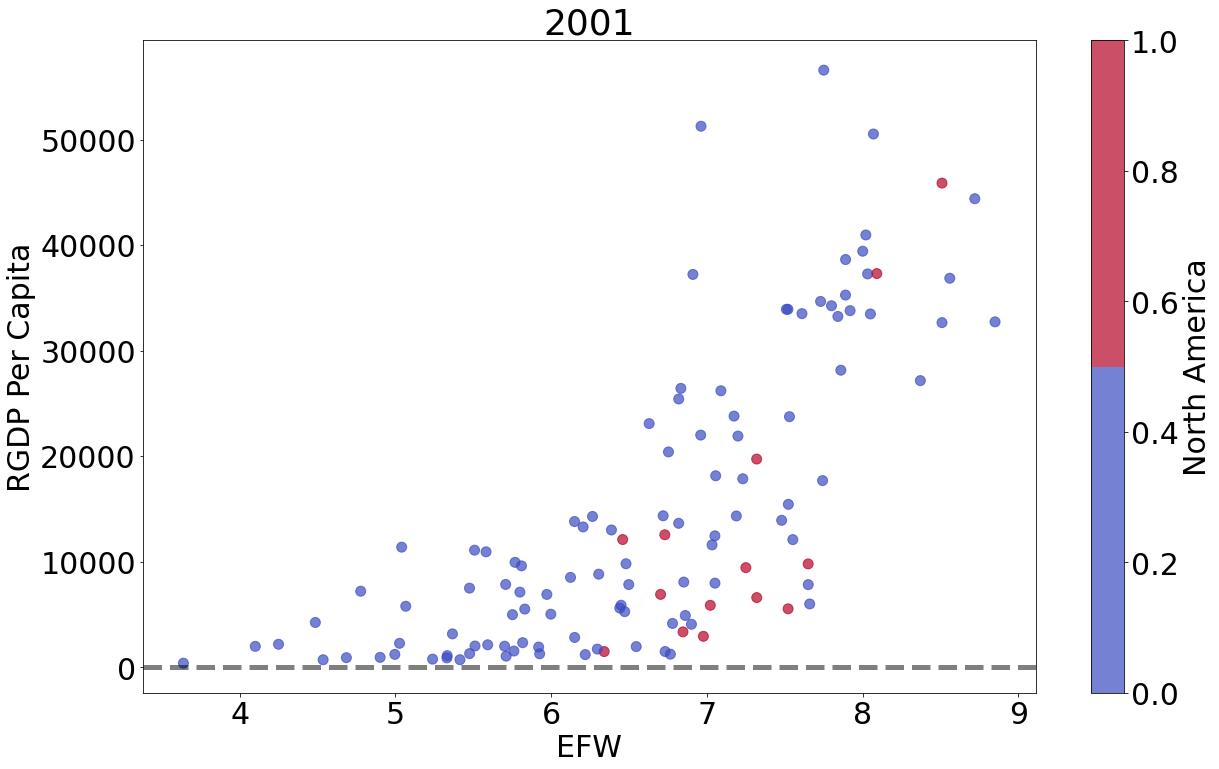

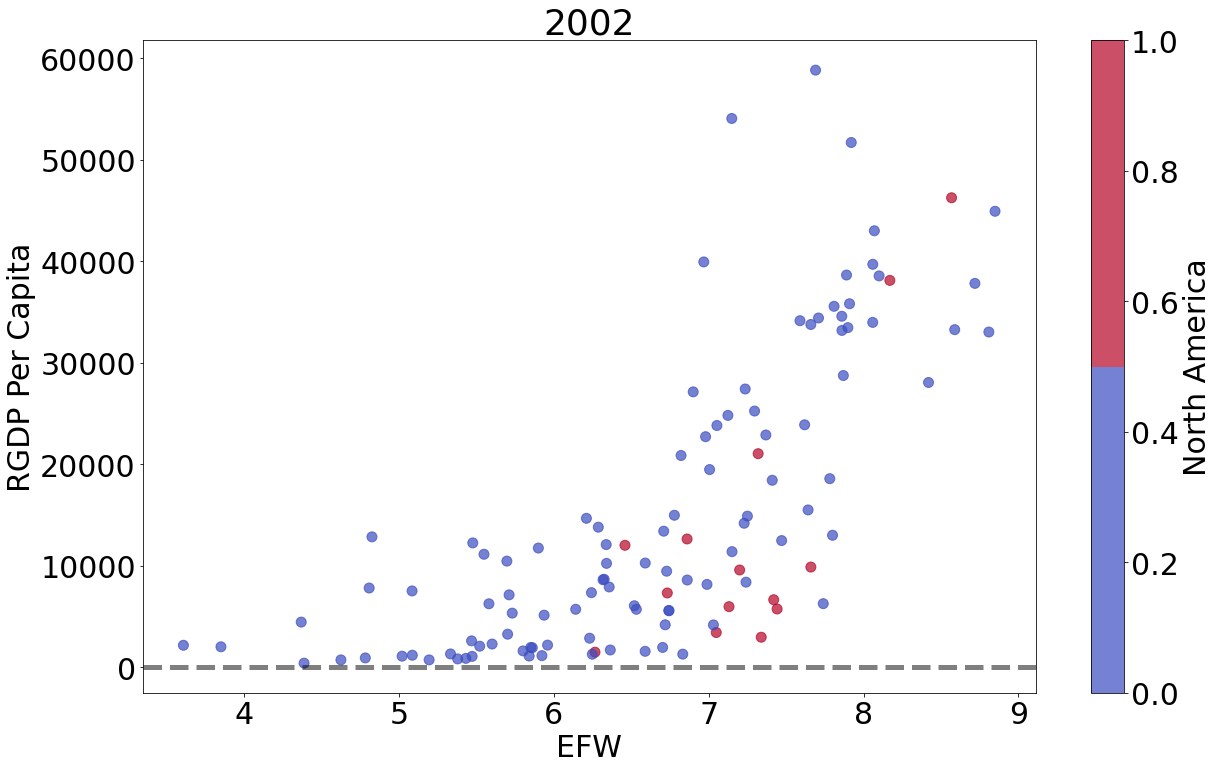

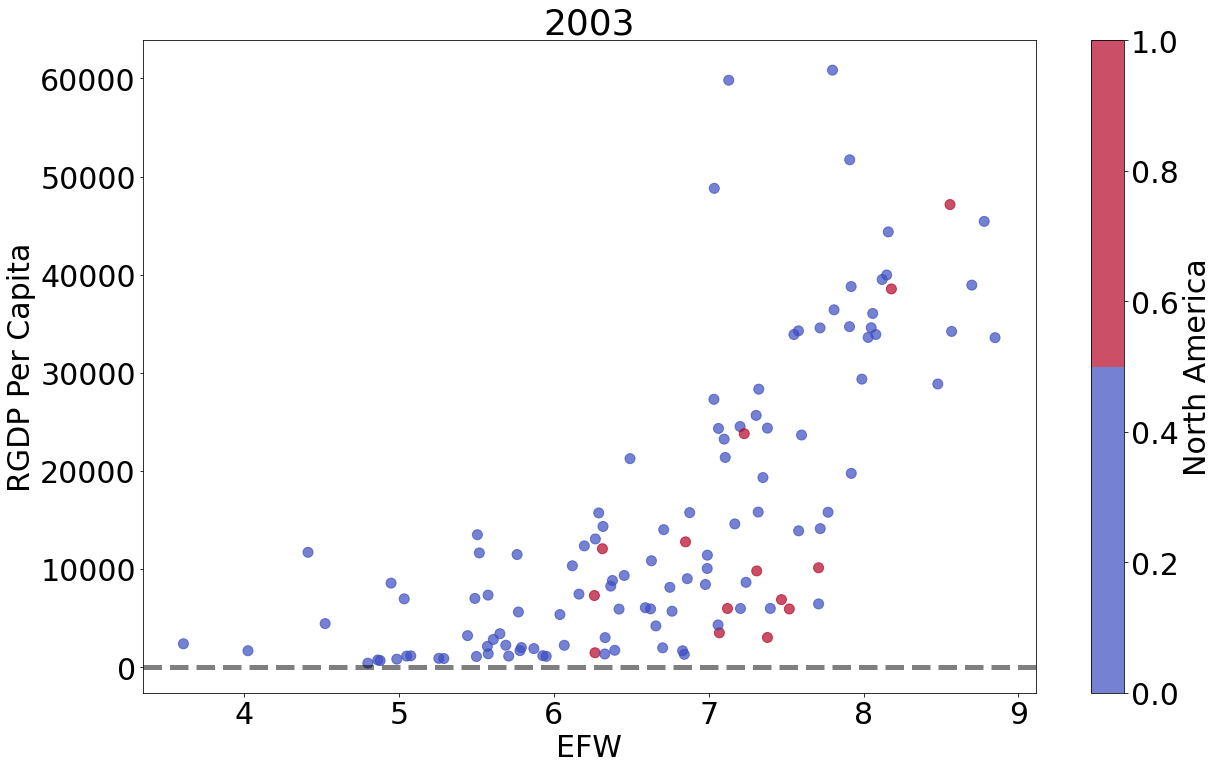

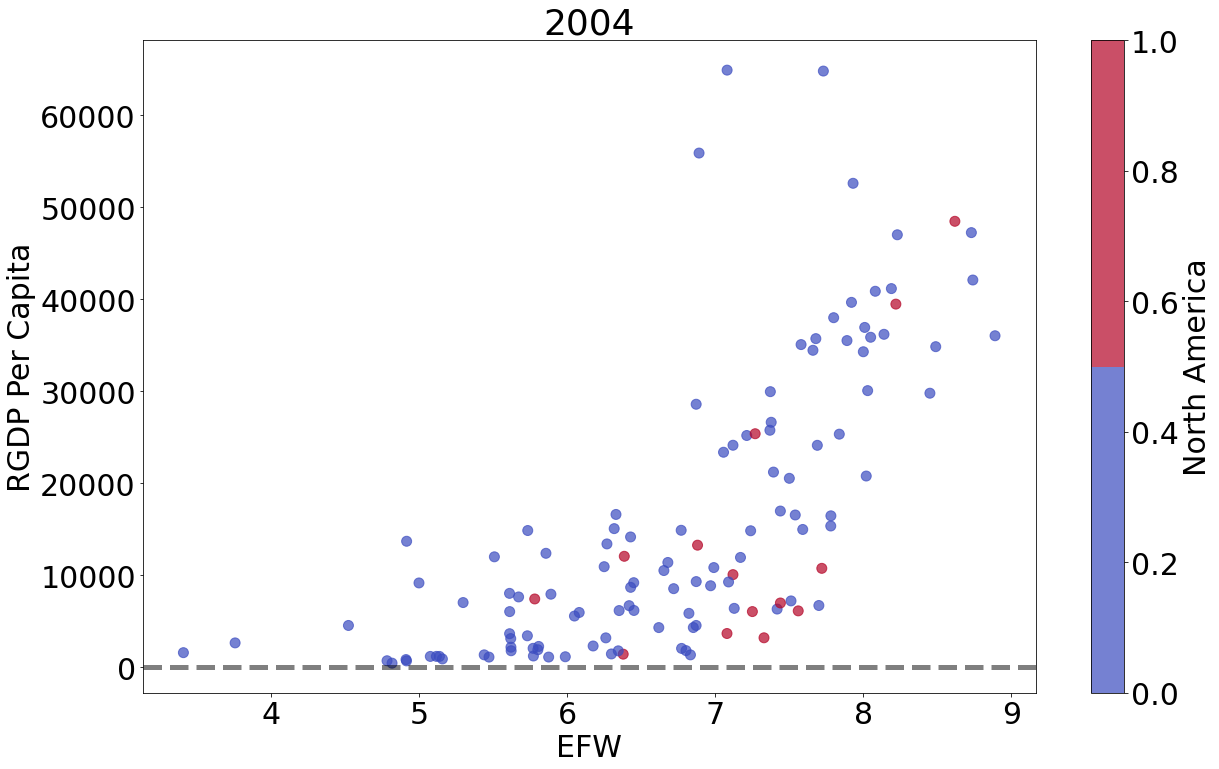

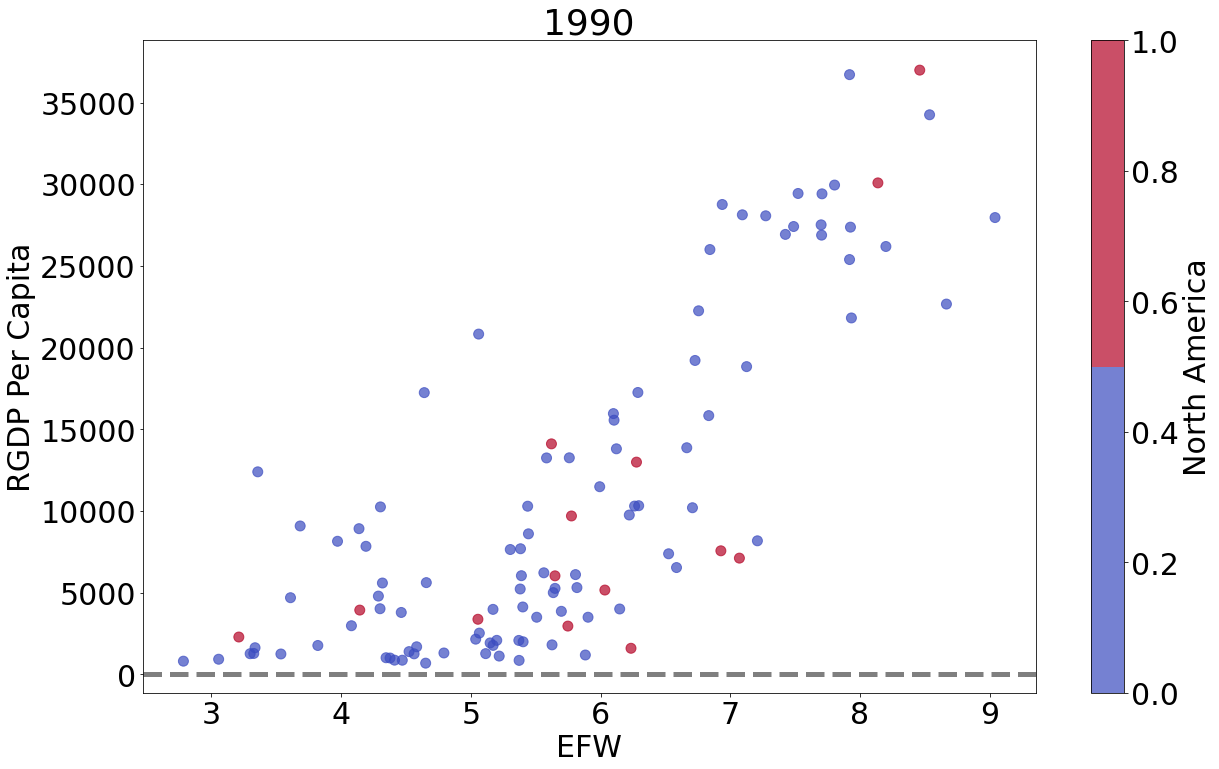

In [8]:
from matplotlib import cm
plt.rcParams.update({"font.size":30})
years = data.dropna().index.get_level_values("Year").unique()
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
for year in years:

    plot_data = data[data.index.get_level_values("Year") == year]
    fig, ax = plt.subplots(figsize = (20, 12))
    plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "North America",
                      cmap = cmap,
                      s = 100,
                      alpha = .7,
                      ax = ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)

In [9]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan

In [12]:
def create_quantile(n,
                   data,
                   year,
                   quantile_var,
                   quantile_name):
    # index that identifies countries for a given year
    year_index = data.index.get_level_values("Year") == year
    quantile_values_dict = {i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n+1)}
    for index in data[year_index].index:
        # identify value of the variable of interest
        val = data.loc[index][quantile_var]
        for i in range(1, n+1):
            if val <= quantile_values_dict[i]:
                data.loc[index,[quantile_name]] = int((n+1) - i)
                break
        else:
            continue
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)
data.loc["USA"]

,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita,North America,RGDP Per Capita 5-tile
Year,,,,,,,,,,,,,,
1970-01-01,US,North America,NaN,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,1.648185,23958.0000,1,NaN
1975-01-01,US,North America,NaN,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,1.483975,25956.0000,1,NaN
1980-01-01,US,North America,NaN,United States,8.101368,5.788734,8.684269,9.122306,8.544966,8.359863,1.322304,29611.0000,1,NaN
1985-01-01,US,North America,NaN,United States,8.295413,6.582616,8.726823,9.339660,8.505198,8.335644,1.031484,33023.0000,1,NaN
1990-01-01,US,North America,H,United States,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,0.853932,36982.0000,1,1.0
1995-01-01,US,North America,H,United States,8.588435,7.446569,8.587870,9.787931,8.594211,8.538840,0.828418,39390.6254,1,1.0
2000-01-01,US,North America,H,United States,8.648077,7.704726,8.773170,9.607665,8.466601,8.739485,0.683215,45886.4705,1,1.0
2001-01-01,US,North America,H,United States,8.509072,7.521319,8.615158,9.612028,8.397002,8.464019,0.744511,45878.0092,1,1.0
2002-01-01,US,North America,H,United States,8.568646,7.673536,8.370127,9.724310,8.298912,8.819880,0.760212,46266.2959,1,1.0


<AxesSubplot:xlabel='EFW', ylabel='RGDP Per Capita'>

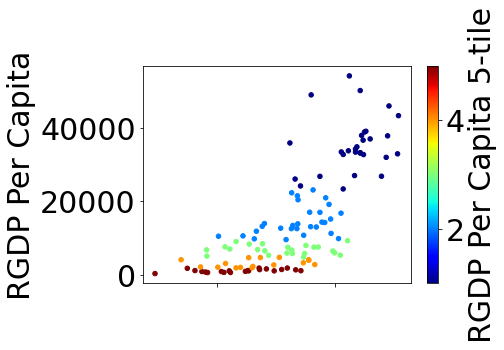

In [13]:
year = "2000"
plot_data = data[data.index.get_level_values("Year") == year]
plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "RGDP Per Capita " + str(n)+ "-tile", cmap = "jet")